In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


經過info()函式觀察到train資料。
survived代表這個人最後有沒有活下來
pclass代表的是這個人買的船票的等級，總共有三等，1等最貴、3等最便宜
Name是乘客的名字。原本以為這是一個沒有用的特徵，但後來發現在名字這一項特徵中有所謂的稱謂，也就是Mr、Miss等等，可以幫助我觀察到一些現象。
Sex是性別，也就是乘客的性別。
Age是乘客的年齡。
sibsp是在船上同為兄弟姐妹或配偶的數目。
parch是在船上同為家族的父母及小孩的數目。
ticket是船票的編號、fare是船票的價格。
cabin是船艙的編號。
embarked是乘客上船的港口。總共有三個港，分別是C = Cherbourg、Q = Queenstown、S = Southampton。Southampton是鐵達尼號出航的港口。
Age, Cabin, Embark有空的值。
可能要自己來填補這些空值。

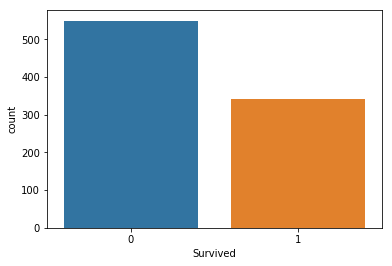

In [6]:
sns.countplot(train['Survived'])

直接把生存與否畫成圖表來看看。生存率 = 1表示有活下來，生存率 = 0表示沒有，可以看到死亡的比例比生存下來的比例還要高一些。

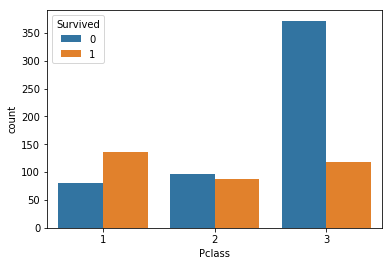

In [10]:
sns.countplot(train['Pclass'], hue=train['Survived'])

pclass這一項特徵說明的是船票的等級，也就是1>2>3，越高級的船票價錢越高，可以通過購買船票的等級來猜測乘客的經濟狀況。並且由圖中可以看到，購買等級三的船票的乘客死亡人數最多，說不定是因為比較有錢的人買了比較高級的一等船票，可以優先坐上救生艇的關係。不過也說不定單純只是因為買便宜船票的人比較多而已。

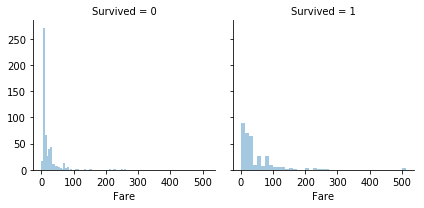

In [15]:
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

這是票價fare的生存率的關係圖。票價和艙等pclass能夠代表的涵義差不多，都是作為乘客經濟背景的特徵。可以看到死亡集中在票價較低的乘客。不過這也可能只是因為買便宜票的人比較多。

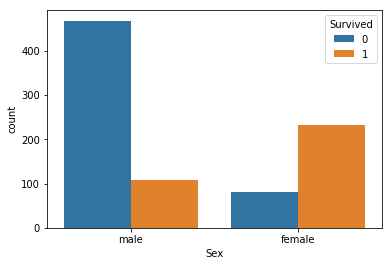

In [16]:
sns.countplot(train['Sex'], hue=train['Survived'])

性別和生存率的關係。可以看到男生的死亡率比女生還高出許多。也許這是到了緊要關頭，男生還在耍帥讓女生先跑的結果。

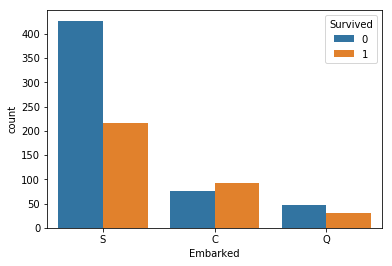

In [17]:
sns.countplot(train['Embarked'], hue=train['Survived'])

這張圖表示乘客們出發的港口與生存率的關係。可以看到從S這個港口，也就是Southampton出航的乘客們死亡的數量多出從其他兩個港口上船的乘客非常多。推測可能是因為從S港出發的人買的船票都比較便宜的關係。

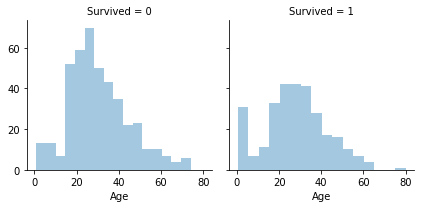

In [20]:
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

這是年齡與生存率的關係。可以看到年紀小的族群的確生存機率比較高一些。可能是因為大家都希望可以保護幼苗的關係。不過也有可能是因為年紀較小的孩童都有父母隨行保護的關係。

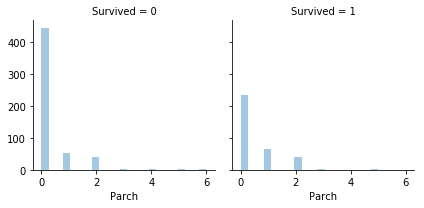

In [21]:
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

這是父母有跟小孩一起來的數量與生存率的關係圖。可以看到有跟父母一起來的生存率比起沒有跟著父母的還要高一些。可能就是因為有沒有父母保護的差別。

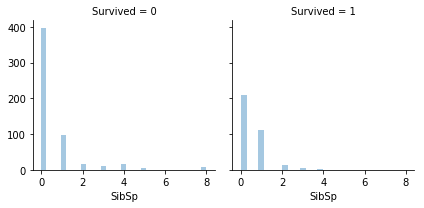

In [22]:
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)

這是有兄弟姊妹或伴侶同行的人與生存率的關係圖。有兄弟姊妹或伴侶同行的人的生存率比起自己來的人還要高一些。可能是在那種危急的狀況之下，能夠靠著同伴之間的互相幫助，度過難關。

資料來源
https://www.kaggle.com/c/titanic/data#_=_